In [1]:
import warnings
warnings.filterwarnings('ignore')
import os 
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor
from keras.optimizers import adam_v2
from tensorflow.keras.optimizers import Adam
import seaborn as sn 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.feature_selection import mutual_info_regression,SelectKBest,RFE
from yellowbrick.model_selection import RFECV
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error ,r2_score
from keras.layers import Dropout




# Neural Network Gas Turbines

In [2]:
df = pd.read_csv(r"C:\Users\Adith\Desktop\Data Science_Excel R\home assignments\neural networks\gas_turbines.csv")

# Data Exploratory

In [3]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
#checking with our features 
df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [5]:
#checking with info of our data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [6]:
#checking with shape of our data 
df.shape

(15039, 11)

In [7]:
#checking if any duplicate values 
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15034    False
15035    False
15036    False
15037    False
15038    False
Length: 15039, dtype: bool

In [8]:
#we have no duplicate values 
df[df.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [9]:
#checking for any null values # no null values
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [10]:
#checking with descriptive statistics 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


In [11]:
#we observe the mean of features are not on same scale and we know that for smooth convergence features have to
#inherit same scale

In [12]:
#rearranging our dependent and independent variables 
df2 = df[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'CO','NOX', 'TAT','TIT','CDP','TEY',]]

In [13]:
#our new columns 
df2.head()

,AT,AP,AH,AFDP,GTEP,CO,NOX,TAT,TIT,CDP,TEY
0,6.8594,1007.9,96.799,3.5000,19.663,3.1547,82.722,550.00,1059.2,10.605,114.70
1,6.7850,1008.4,97.118,3.4998,19.728,3.2363,82.776,550.00,1059.3,10.598,114.72
2,6.8977,1008.8,95.939,3.4824,19.779,3.2012,82.468,549.87,1059.4,10.601,114.71
3,7.0569,1009.2,95.249,3.4805,19.792,3.1923,82.670,549.99,1059.6,10.606,114.72
4,7.3978,1009.7,95.150,3.4976,19.765,3.2484,82.311,549.98,1059.7,10.612,114.72


# Visualizations

AT


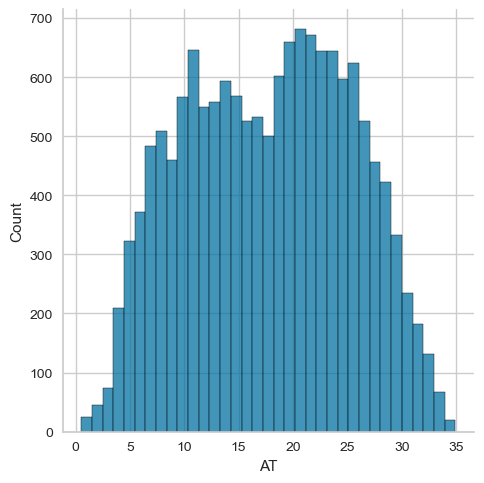

<Figure size 2000x1000 with 0 Axes>

AP


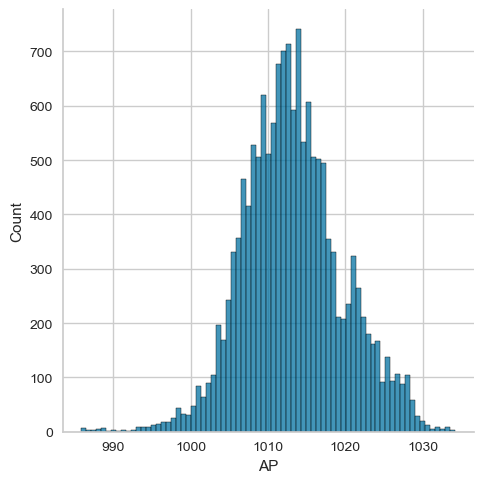

<Figure size 2000x1000 with 0 Axes>

AH


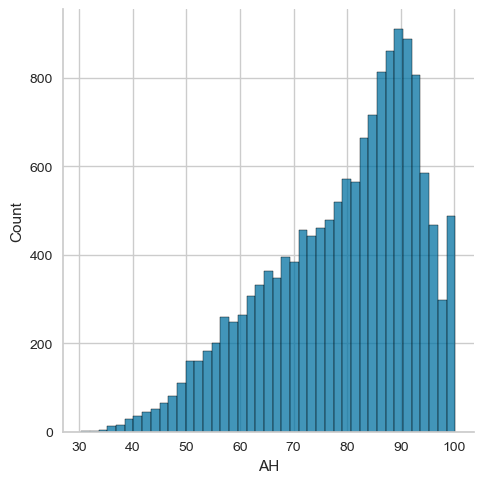

<Figure size 2000x1000 with 0 Axes>

AFDP


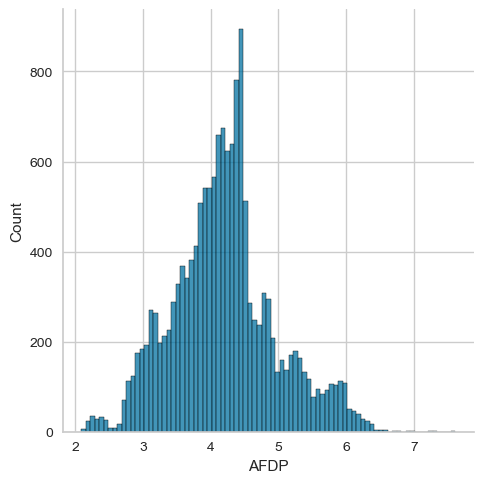

<Figure size 2000x1000 with 0 Axes>

GTEP


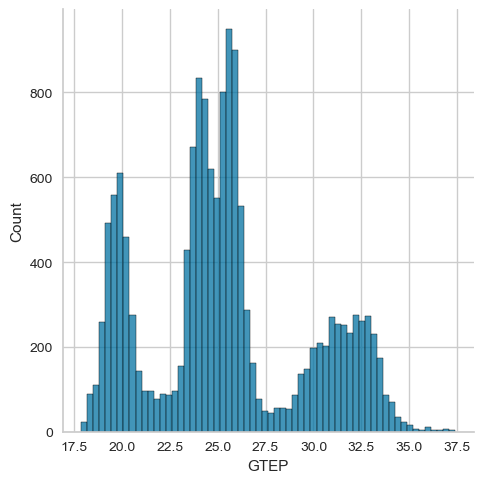

<Figure size 2000x1000 with 0 Axes>

CO


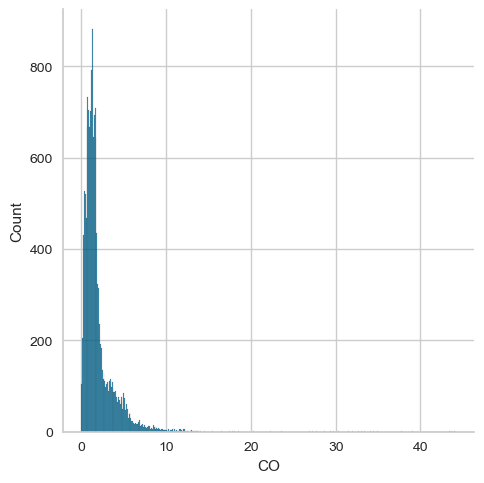

<Figure size 2000x1000 with 0 Axes>

NOX


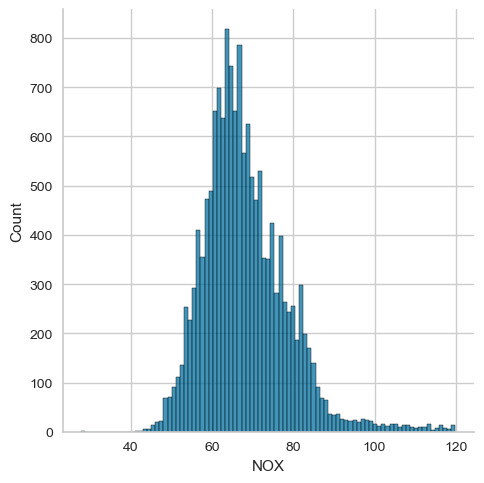

<Figure size 2000x1000 with 0 Axes>

TAT


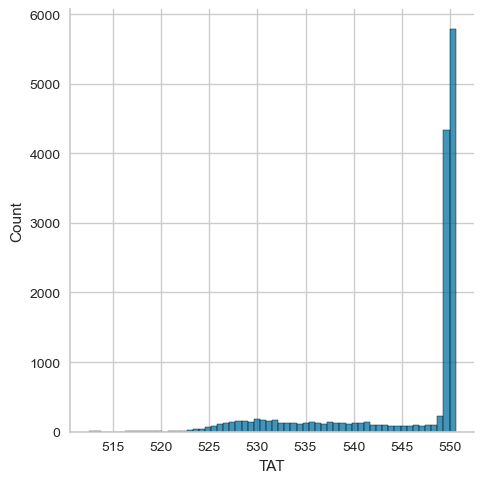

<Figure size 2000x1000 with 0 Axes>

TIT


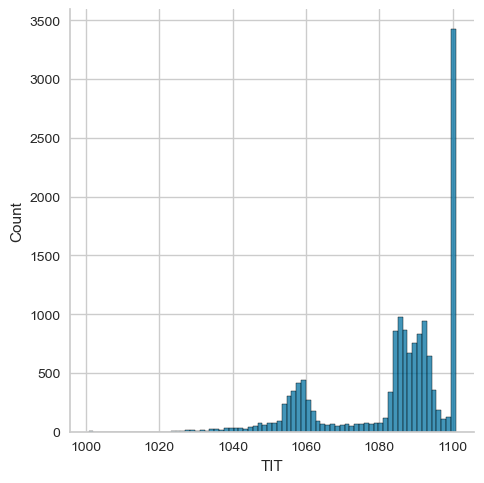

<Figure size 2000x1000 with 0 Axes>

CDP


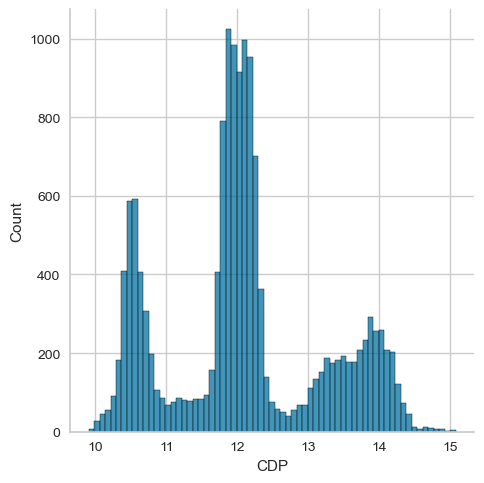

<Figure size 2000x1000 with 0 Axes>

TEY


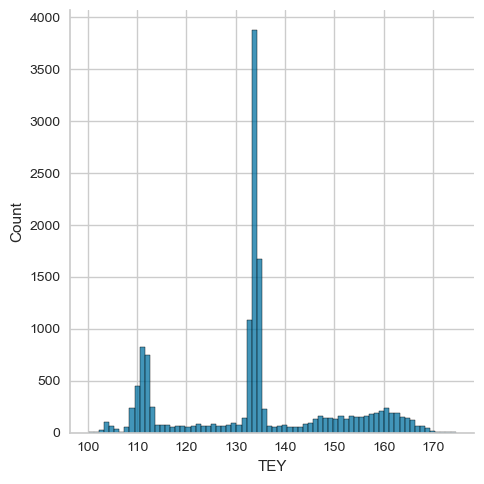

<Figure size 2000x1000 with 0 Axes>

In [14]:
#checking with distribution of data
for n in df2.columns:
    print(n)
    sn.displot(df2[n])
    plt.figure(figsize=(20,10))
    plt.show()

In [15]:
#checking with correlation
df2.corr()

,AT,AP,AH,AFDP,GTEP,CO,NOX,TAT,TIT,CDP,TEY
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,-0.088588,-0.600006,0.338569,0.093067,-0.100705,-0.207495
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.041614,0.256744,-0.223479,0.029650,0.131198,0.146939
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,0.165505,0.143061,0.010859,-0.247781,-0.182010,-0.110272
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,-0.334207,-0.037299,-0.571541,0.627254,0.727152,0.717995
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,-0.508259,-0.208496,-0.756884,0.874526,0.993784,0.977042
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,1.000000,0.316743,0.063404,-0.688272,-0.520783,-0.541751
NOX,-0.600006,0.256744,0.143061,-0.037299,-0.208496,0.316743,1.000000,0.009888,-0.231636,-0.169103,-0.102631
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,0.063404,0.009888,1.000000,-0.357320,-0.744740,-0.720356
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,-0.688272,-0.231636,-0.357320,1.000000,0.887238,0.891587
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,-0.520783,-0.169103,-0.744740,0.887238,1.000000,0.988473


<AxesSubplot:>

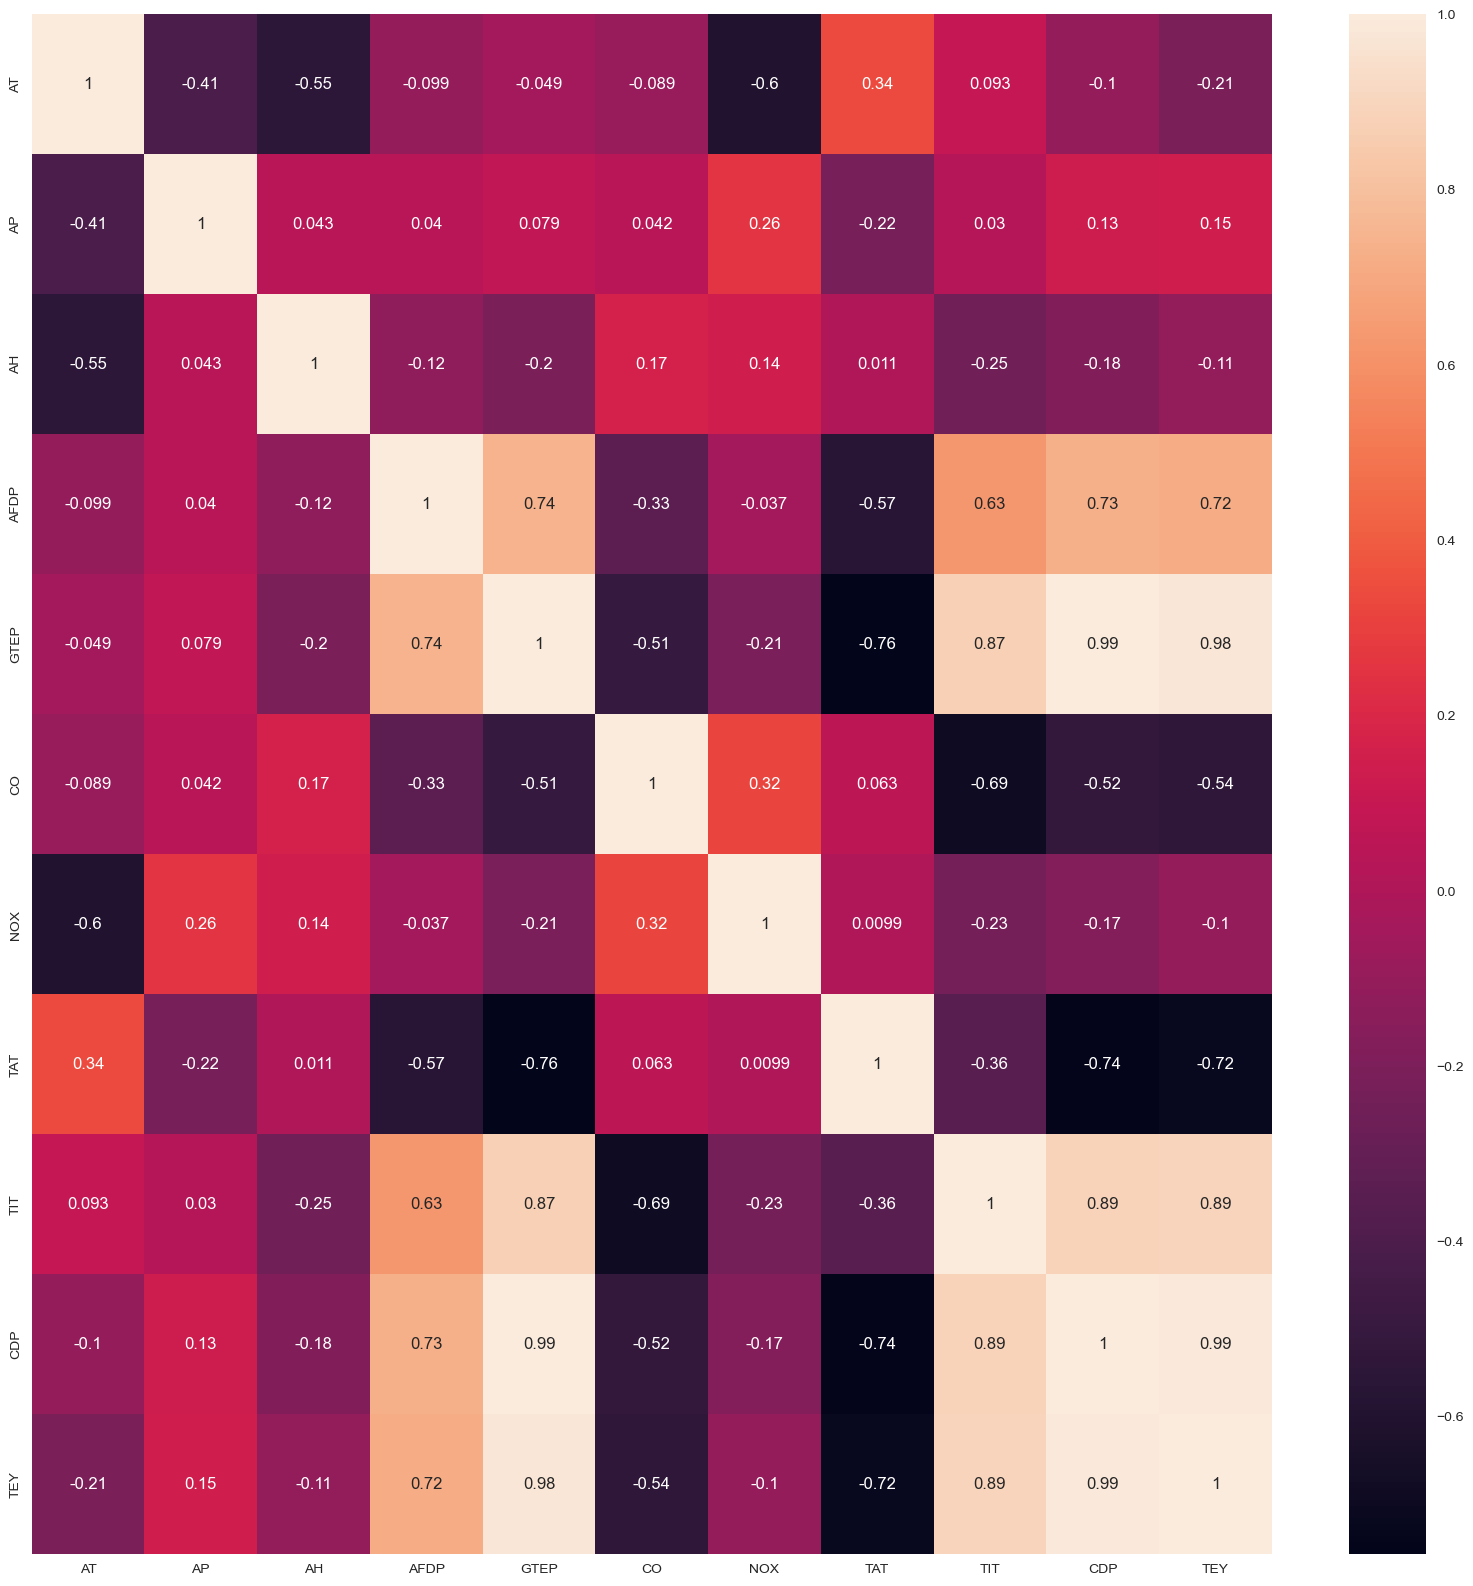

In [16]:
#plotting the maximum correlation with plot 
corr=df2.corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sn.heatmap(df[top_features].corr(),annot=True)

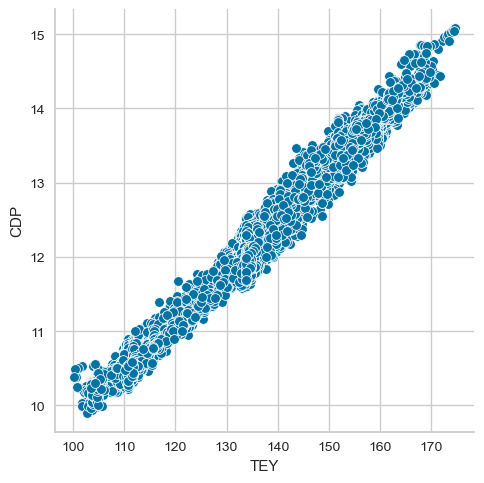

In [17]:
#plotting the realation between  turbine energy yield (TEY) and compressor discharge Pressure(CDP)
sn.relplot(data=df2,x='TEY',y='CDP')

In [18]:
## we observe that as the levels of cdp increases the energy levels of turbines also increases

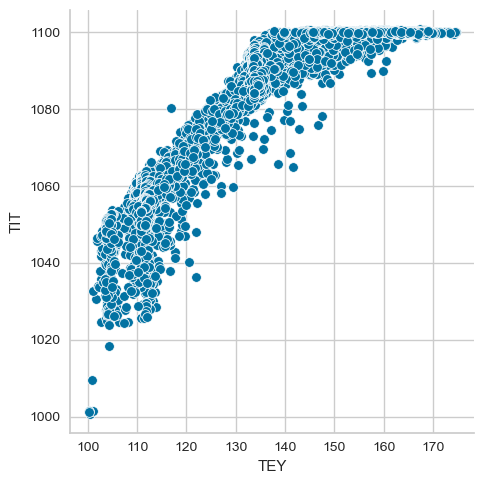

In [19]:
#plotting the realation between  turbine energy yield (TEY) and Turbine inlet temperature (TIT)
sn.relplot(data=df2,x='TEY',y='TIT')

In [20]:
## we observe that the temperature as gradually increases the energy of turbine levels also increase after a 
## certain interval

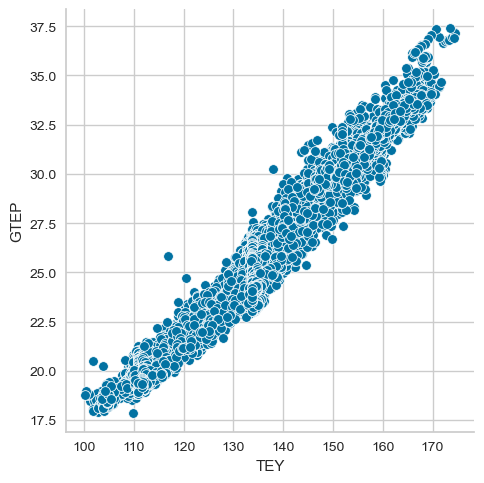

In [21]:
#plotting the realation between  turbine energy yield (TEY) and gas turbine exhaust presure(GTEP)
sn.relplot(data=df2,x='TEY',y='GTEP')

In [22]:
## we can say that as the energy of turbines reach to peak the pressure from the exhaust reaches the peak ##

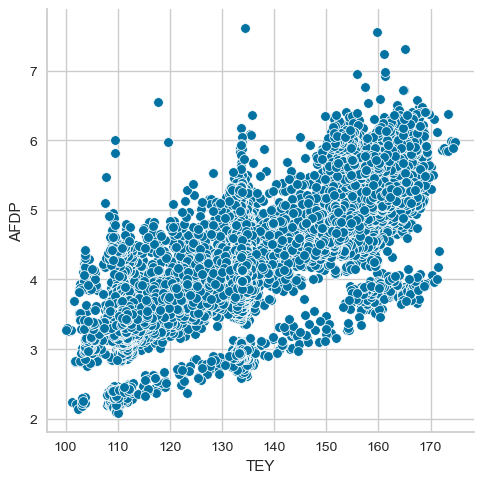

In [23]:
#plotting the realation between  turbine energy yield (TEY) and Air filter difference pressure(AFDP)
sn.relplot(data=df2,x='TEY',y='AFDP')

In [24]:
## we observe that at different energy levels of turbines,air filter pressure varies and as the energy goes higher
## the task performed by the filter is at peak 

<AxesSubplot:>

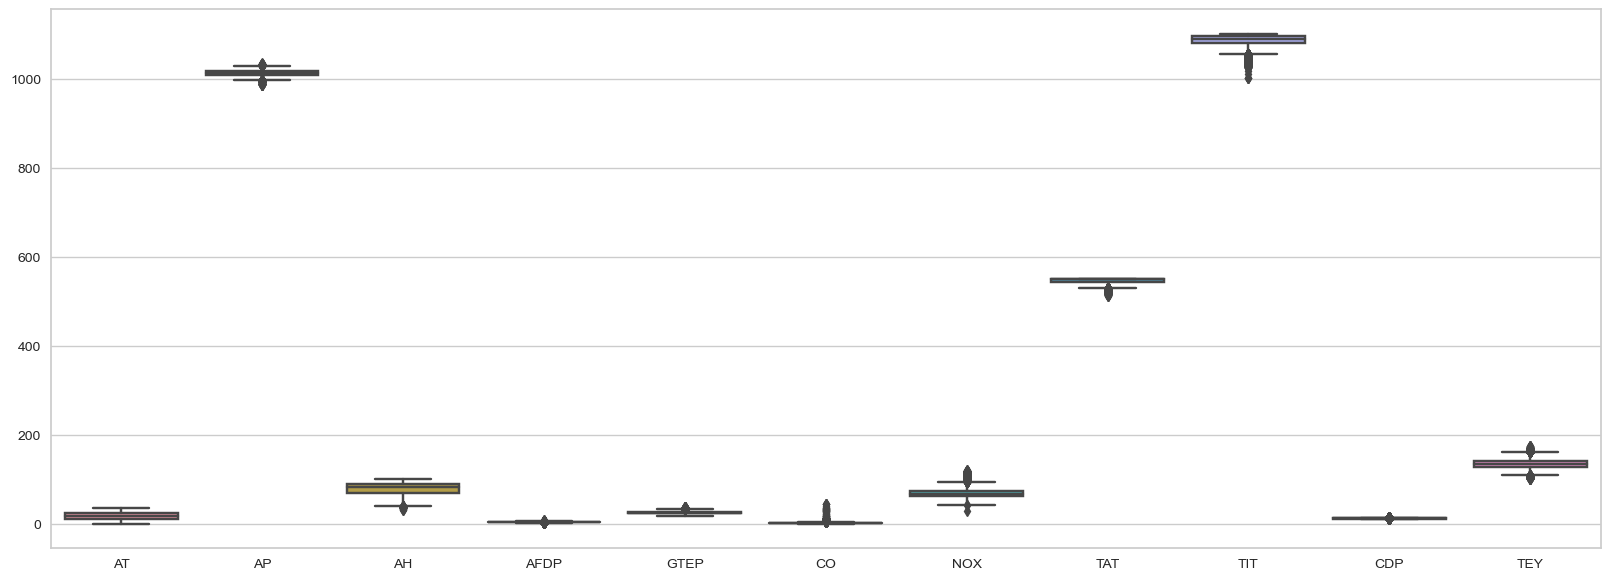

In [25]:
## after all key observations lets look for outliers ## 
plt.figure(figsize=(20,7))
sn.boxplot(data = df2)


In [26]:
## we observe that we dont have extreme outliers ##

AT


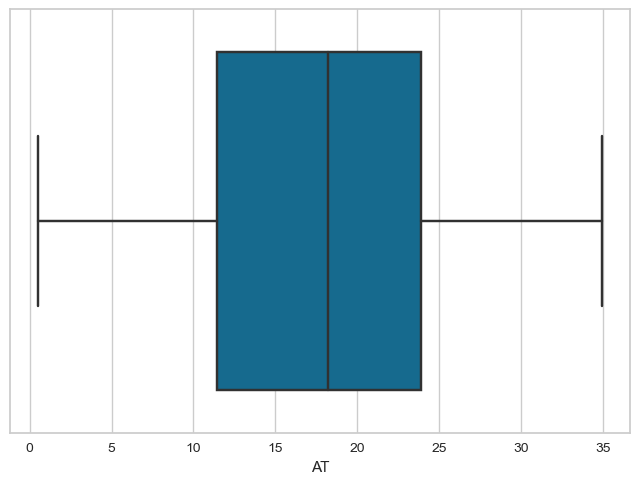

AP


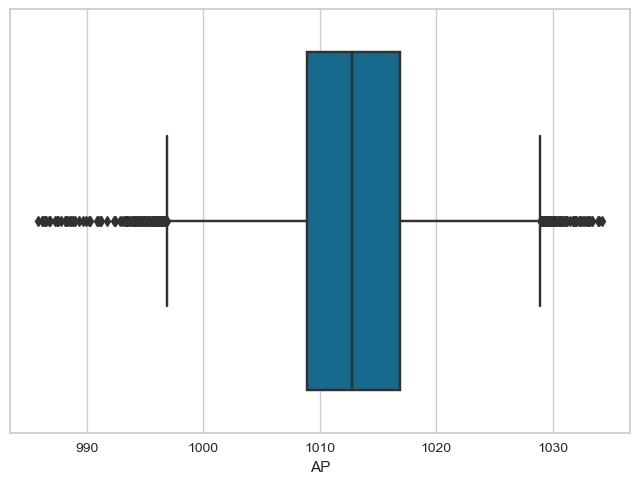

AH


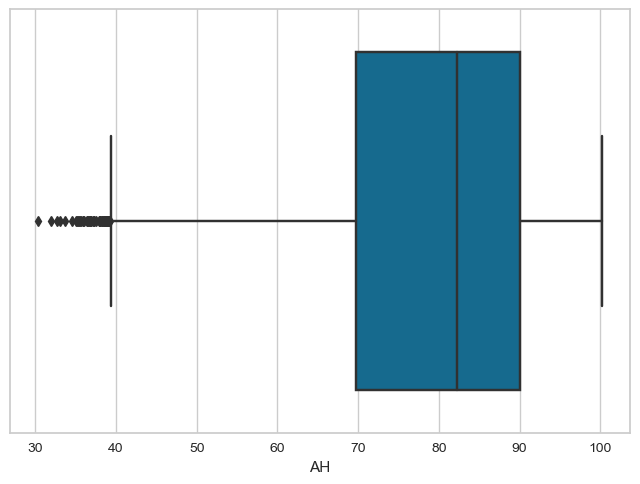

AFDP


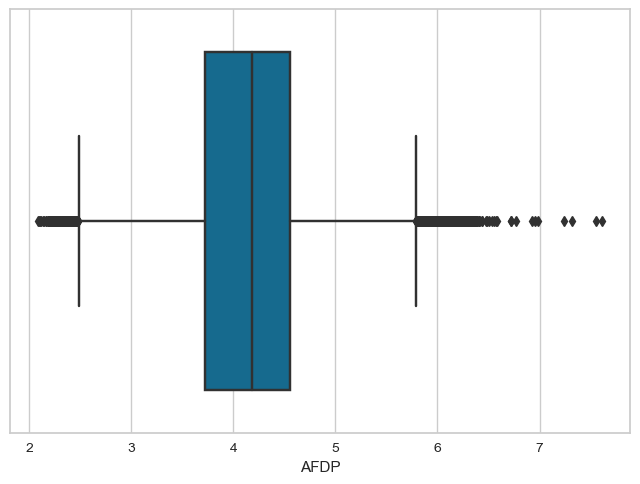

GTEP


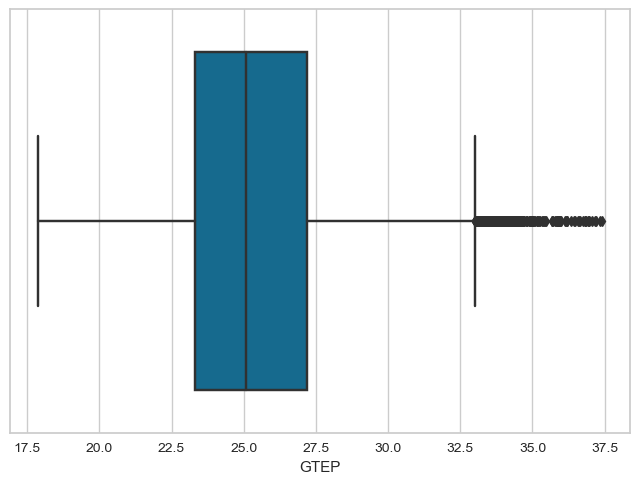

CO


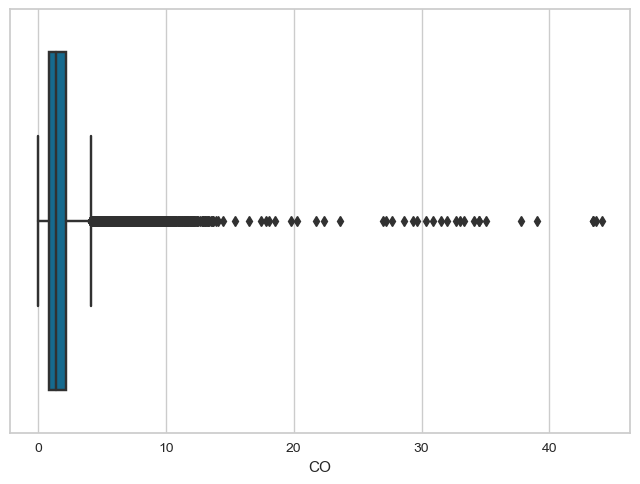

NOX


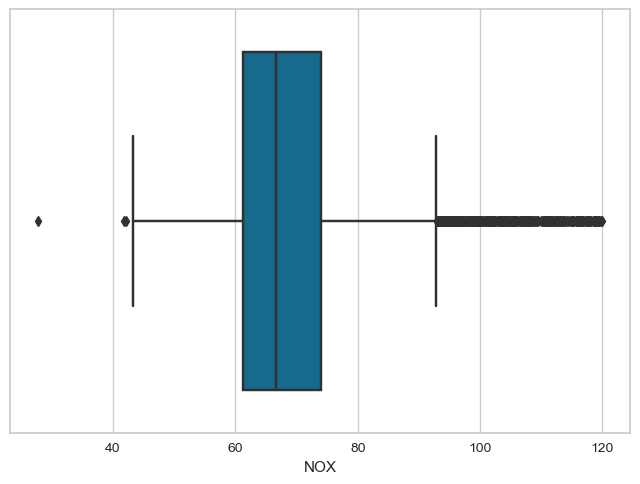

TAT


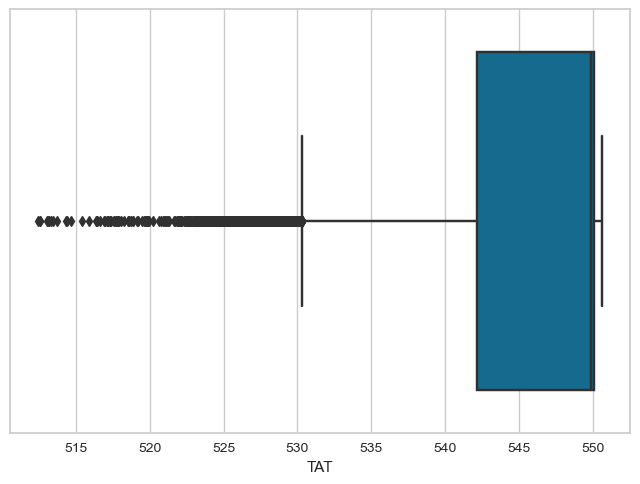

TIT


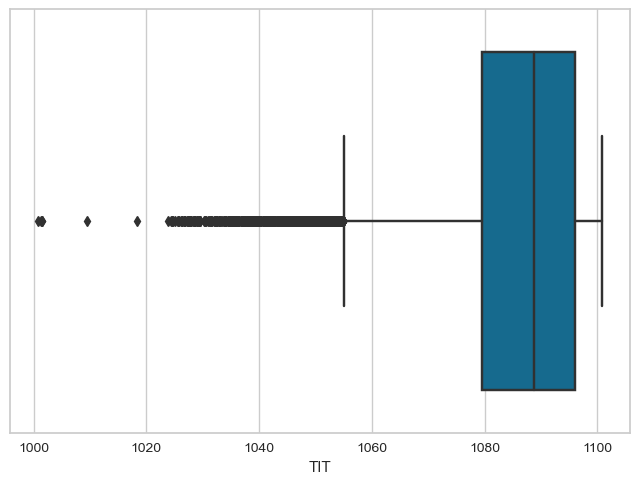

CDP


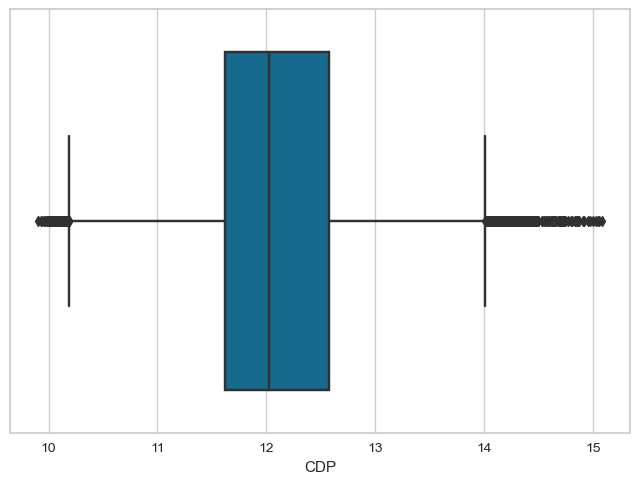

TEY


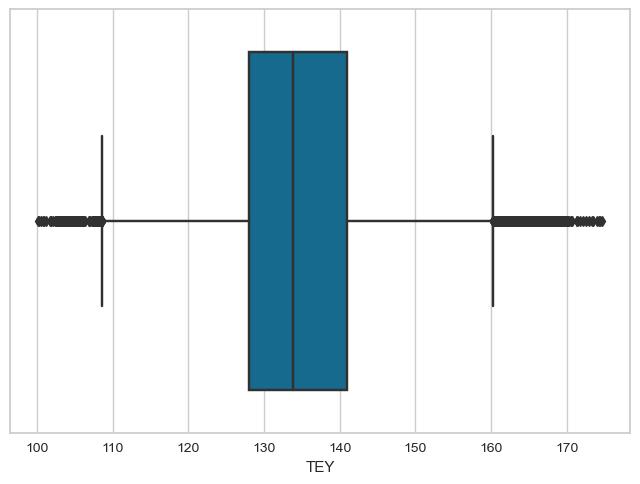

In [27]:
#checking outliers  with each feature 
for n in df2.columns:
    print(n)
    sn.boxplot(df2[n])
    plt.show()

# EDA Techniques

# Outlier Analysis

In [28]:
#outlier analysis by
#Iqr method 
sorted(df2)

['AFDP', 'AH', 'AP', 'AT', 'CDP', 'CO', 'GTEP', 'NOX', 'TAT', 'TEY', 'TIT']

In [29]:
quantile1, quantile3= np.percentile(df2,[25,75])

In [30]:
print(quantile1,quantile3)

12.001 542.17


In [31]:
## Find the IQR

iqr =quantile3-quantile1
print(iqr)

530.169


In [32]:
## Find the lower value and the higher  value

lower_val = quantile1 -(1.5 * iqr) 
upper_val = quantile3 +(1.5 * iqr)

In [33]:
print(lower_val,upper_val)

-783.2525 1337.4234999999999


In [34]:
#locating outliers greater than upper limit
df2 > upper_val

,AT,AP,AH,AFDP,GTEP,CO,NOX,TAT,TIT,CDP,TEY
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
15034,False,False,False,False,False,False,False,False,False,False,False
15035,False,False,False,False,False,False,False,False,False,False,False
15036,False,False,False,False,False,False,False,False,False,False,False
15037,False,False,False,False,False,False,False,False,False,False,False


In [35]:
#locating outliers greater than lower limit
print(df2<lower_val)

          AT     AP     AH   AFDP   GTEP     CO    NOX    TAT    TIT    CDP  \
0      False  False  False  False  False  False  False  False  False  False   
1      False  False  False  False  False  False  False  False  False  False   
2      False  False  False  False  False  False  False  False  False  False   
3      False  False  False  False  False  False  False  False  False  False   
4      False  False  False  False  False  False  False  False  False  False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
15034  False  False  False  False  False  False  False  False  False  False   
15035  False  False  False  False  False  False  False  False  False  False   
15036  False  False  False  False  False  False  False  False  False  False   
15037  False  False  False  False  False  False  False  False  False  False   
15038  False  False  False  False  False  False  False  False  False  False   

         TEY  
0      False  
1      False  
2     

In [36]:
#substitute method of iqr to check our analysis on outliers
outlier = []
def detect_outlier_iqr(df2):
    df2 = sorted(df2)
    q1 = np.percentile(df2,25)
    q3 = np.percentile(df2,75)
    print(q1,q3)
    iqr = q3-q1
    ll = q1 -(1.5*iqr)
    ul = q3+(1.5*iqr)
    print(ll,ul)
    
    for i in df2:
        if(i<ll or i>ul):
            outlier.append(i)
            return outlier
        outliers = detect_outlier_iqr(df2)
  
    
   

In [37]:
print("outliers from iqr method",outlier)

outliers from iqr method []


In [38]:
## we come to conclusion that we dont have any outliers in the given dataset ##

# Feature selection techniques

In [39]:
#bivariate analysis 
#splitting our independent and dependent variables 

X = df2.iloc[:,0:10]
y = df2.iloc[:,10]

print(X.shape,y.shape)

(15039, 10) (15039,)


In [40]:
best_feat = SelectKBest(score_func=mutual_info_regression,k = 7)
feat_sel = best_feat.fit(X,y)

In [41]:
#summarise scores 
scores = feat_sel.scores_

features = feat_sel.transform(X)

In [42]:
#fitting our scores in Dataframe
score_df = pd.DataFrame(list(zip(scores,X.columns)),
                       columns =['score','Feature'])
score_df.sort_values(by="score",ascending=False,inplace=True)
score_df

,score,Feature
9,1.712732,CDP
4,1.599730,GTEP
8,1.321984,TIT
7,0.892864,TAT
3,0.660566,AFDP
5,0.512853,CO
0,0.412619,AT
6,0.300500,NOX
1,0.136702,AP
2,0.097362,AH


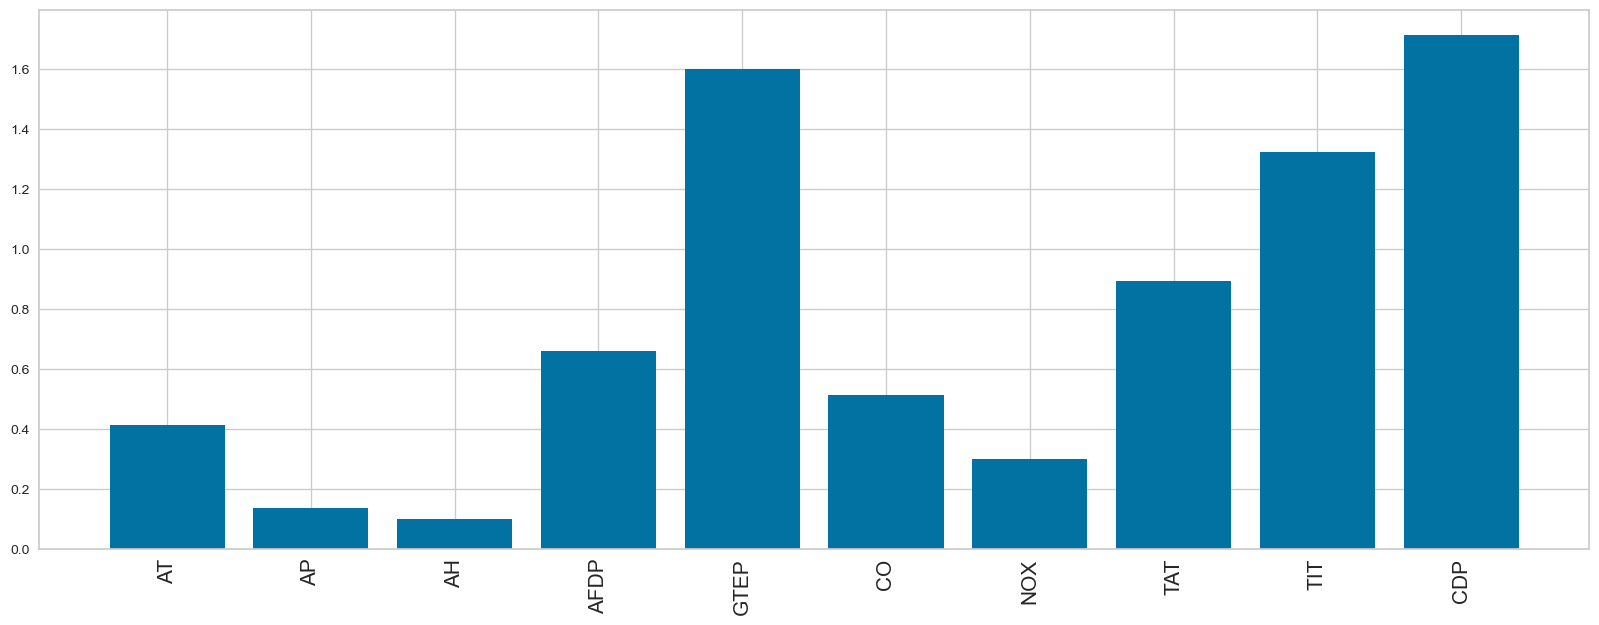

In [43]:
#plotting the scores 
fig,axes = plt.subplots(figsize =(20,7))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9])
axes.set_xticklabels(X.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()


In [44]:
#feature selection by recursive feature extraction
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [45]:
rfe = RFE(lr,n_features_to_select=7)
rfe.fit(X,y)

RFE(estimator=LinearRegression(), n_features_to_select=7)

In [46]:
rfe.ranking_

array([1, 1, 4, 1, 1, 2, 3, 1, 1, 1])

In [47]:
rfe.support_

array([ True,  True, False,  True,  True, False, False,  True,  True,
        True])

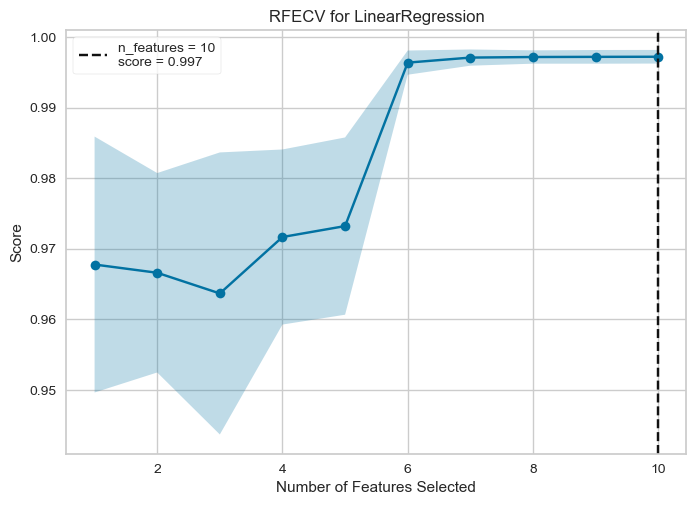

<AxesSubplot:title={'center':'RFECV for LinearRegression'}, xlabel='Number of Features Selected', ylabel='Score'>

In [48]:
visualizer = RFECV(LinearRegression(normalize=True))
visualizer.fit(X,y)
visualizer.show()

In [49]:
## after using both feature selection we select our bivariate analysis as rfe might be overfitting with accuracy ##

In [50]:
#selecting our best features and storing into our new dataframe
df3 = df2[['AFDP', 'GTEP', 'TIT', 'TAT','CDP', 'CO','TEY']]

In [51]:
df3.head()

,AFDP,GTEP,TIT,TAT,CDP,CO,TEY
0,3.5000,19.663,1059.2,550.00,10.605,3.1547,114.70
1,3.4998,19.728,1059.3,550.00,10.598,3.2363,114.72
2,3.4824,19.779,1059.4,549.87,10.601,3.2012,114.71
3,3.4805,19.792,1059.6,549.99,10.606,3.1923,114.72
4,3.4976,19.765,1059.7,549.98,10.612,3.2484,114.72


In [52]:
## as we have a cleaned data lets fit hyperparameters for neural network ##

# Hyperparameter tuning for neural network

In [53]:
#standardizing our values 
std = StandardScaler()
df_scaled =std.fit_transform(df3)
df_scaled


array([[-0.92123188, -1.37910125, -1.48837592, ..., -1.35733078,
         0.53201195, -1.23117246],
       [-0.92149498, -1.36352783, -1.4823253 , ..., -1.36367619,
         0.56873344, -1.22990897],
       [-0.94438456, -1.35130868, -1.47627469, ..., -1.36095673,
         0.5529378 , -1.23054071],
       ...,
       [-0.95148822, -1.41096688, -2.78925732, ..., -1.46792219,
         2.69592467, -1.5160891 ],
       [-0.98884822, -1.44762432, -2.4564737 , ..., -1.42259784,
         1.9246834 , -1.48134317],
       [-1.01660512, -1.46463529, -2.05108275, ..., -1.37727349,
         1.35415028, -1.42827666]])

In [54]:
#storing our array values in a dataframe 
pd.DataFrame(df_scaled)


,0,1,2,3,4,5,6
0,-0.921232,-1.379101,-1.488376,0.585240,-1.357331,0.532012,-1.231172
1,-0.921495,-1.363528,-1.482325,0.585240,-1.363676,0.568733,-1.229909
2,-0.944385,-1.351309,-1.476275,0.568715,-1.360957,0.552938,-1.230541
3,-0.946884,-1.348194,-1.464173,0.583969,-1.356424,0.548933,-1.229909
4,-0.924389,-1.354663,-1.458123,0.582698,-1.350985,0.574179,-1.229909
...,...,...,...,...,...,...,...
15034,-0.865850,-1.498657,-2.063184,0.103453,-1.543161,1.145792,-1.426381
15035,-0.913470,-1.438759,-2.268905,-0.276638,-1.513247,1.293578,-1.415642
15036,-0.951488,-1.410967,-2.789257,-1.026650,-1.467922,2.695925,-1.516089
15037,-0.988848,-1.447624,-2.456474,-0.528337,-1.422598,1.924683,-1.481343


In [58]:
#splitting our new standardized values 
X2 = df_scaled[:,0:6]
y2 = df_scaled[:,6]
print(X2.shape,y2.shape)

(15039, 6) (15039,)



# Tuning parameters for 
1) batch size
2) Epochs

In [161]:
#create model 
def create_model():
    model = Sequential(name ='Hyperparameter-Tuning-Dummy')
    model.add(Dense(10,input_dim = 6,kernel_initializer='uniform',activation ='relu'))
    model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
    model.add(Dense(1,kernel_initializer='uniform',activation='linear'))
    
    adam = Adam(learning_rate=0.01)
    model.compile(loss='mean_absolute_error',optimizer = adam,metrics=['mean_absolute_error'])
    return model

In [162]:
#fitting our model keras regressor
model = KerasRegressor(build_fn=create_model,verbose = 0)
batch_size = [10,20,30]
epochs = [10,50,100]
param_grid = dict(batch_size=batch_size,epochs=epochs)

In [163]:
#using gridsearch cv for the parameters
grid = GridSearchCV(estimator=model,param_grid=param_grid,cv = KFold(),verbose=0)
grid_results = grid.fit(X2,y2)

In [164]:
#summarise the results
print('Best:{},using {}'.format(grid_results.best_score_,grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
    print('{},{} with: {}'.format(mean,stdev,param))

Best:-0.08327407985925675,using {'batch_size': 30, 'epochs': 100}
-0.10129227042198181,0.030632549399784523 with: {'batch_size': 10, 'epochs': 10}
-0.09028666317462922,0.0226367286099203 with: {'batch_size': 10, 'epochs': 50}
-0.09856483489274978,0.038746908219952976 with: {'batch_size': 10, 'epochs': 100}
-0.09572916328907013,0.029755120320627965 with: {'batch_size': 20, 'epochs': 10}
-0.09163476601243019,0.03296950538773948 with: {'batch_size': 20, 'epochs': 50}
-0.09058080539107323,0.02510636342528868 with: {'batch_size': 20, 'epochs': 100}
-0.10313916206359863,0.03379291521597076 with: {'batch_size': 30, 'epochs': 10}
-0.09202169999480247,0.03740145575382892 with: {'batch_size': 30, 'epochs': 50}
-0.08327407985925675,0.02616665439656088 with: {'batch_size': 30, 'epochs': 100}


# Tuning hyperparameters  for
1 Learning Rate 

2 Drop out rate

In [151]:
#defining the model
def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(10,input_dim = 6,kernel_initializer='normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8,input_dim = 6, kernel_initializer='normal',activation ='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation ='linear'))
    adam = Adam(learning_rate=learning_rate)
    model.compile(loss ='mean_absolute_error',optimizer=adam,metrics=['mean_absolute_error'])
    return model
   

In [152]:
#create model 
model = KerasRegressor(build_fn= create_model,verbose= 0,batch_size = 30,epochs = 100)

In [153]:
#fitting parameters for gridsearch cv 
learning_rate = [0.1,0.01,0.001]
dropout_rate = [0.0,0.1,0.2]


In [154]:
#fitting a dictionary 
param_grid = dict(learning_rate=learning_rate,dropout_rate = dropout_rate)

In [155]:
#fitting our grid search cv
grid = GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
grid_result = grid.fit(X2,y2)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.1.........................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.1;, score=-0.248 total time= 1.7min
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.1.........................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.1;, score=-0.079 total time= 1.8min
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.1.........................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.1;, score=-0.413 total time= 1.7min
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.1.........................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.1;, score=-0.077 total time= 1.6min
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.1.........................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.1;, score=-0.187 total time= 1.6min
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 2/9] 

In [158]:
#summarise the results
print('Best:{},using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
    print('{},{} with: {}'.format(mean,stdev,param))

Best:-0.07767944261431695,using {'dropout_rate': 0.0, 'learning_rate': 0.001}
-0.2007437065243721,0.12483519070716927 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
-0.08874698355793953,0.032884876646906425 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
-0.07767944261431695,0.02370414956533297 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
-0.32358582615852355,0.1407530518593382 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
-0.1379292368888855,0.04305125825390221 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
-0.1302418142557144,0.027907861256967224 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
-0.4146941602230072,0.057250003179951096 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}
-0.21479145139455796,0.05849329582350735 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
-0.14617208689451217,0.028055896856549856 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}


# tuning of hyperparameters
1 Activation function

2 kernel initializer

In [171]:
# defining model 

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(10,input_dim = 6,kernel_initializer=init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(8,input_dim = 6,kernel_initializer=init,activation =activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'linear'))
    
    adam = Adam(0.001)
    model.compile(loss='mean_absolute_error',optimizer = adam,metrics='mean_absolute_error')
    return model

In [172]:
#fitting our model 
model = KerasRegressor(build_fn=create_model,verbose = 0,batch_size = 30,epochs = 100)

In [173]:
#fitting our parameters
activation_function =['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

In [174]:
#fitting dictionary with all our parameters
param_grids = dict(activation_function=activation_function,init=init)

In [175]:
#fitting parameters on gridsearch cv  
grid = GridSearchCV(estimator=model,param_grid=param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X2,y2)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=-0.105 total time=  52.9s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=-0.058 total time= 1.0min
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=-0.101 total time=  54.9s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=-0.061 total time=  52.3s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=-0.077 total time=  52.1s
[CV 1/5; 2/12] START activation_function=softmax, init=norm

In [176]:
#summarise the results
print('Best:{},using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
    print('{},{} with: {}'.format(mean,stdev,param))

Best:-0.07522948384284973,using {'activation_function': 'tanh', 'init': 'normal'}
-0.08007544949650765,0.01959704789007813 with: {'activation_function': 'softmax', 'init': 'uniform'}
-0.07923907041549683,0.017870660691559095 with: {'activation_function': 'softmax', 'init': 'normal'}
-0.7043399095535279,0.16834874258369986 with: {'activation_function': 'softmax', 'init': 'zero'}
-0.07632188573479652,0.02069543291908455 with: {'activation_function': 'relu', 'init': 'uniform'}
-0.0887829951941967,0.03262488600655829 with: {'activation_function': 'relu', 'init': 'normal'}
-0.703730845451355,0.16966587051285967 with: {'activation_function': 'relu', 'init': 'zero'}
-0.09005026072263718,0.02041828380669886 with: {'activation_function': 'tanh', 'init': 'uniform'}
-0.07522948384284973,0.017000754347354083 with: {'activation_function': 'tanh', 'init': 'normal'}
-0.703583937883377,0.169750360963174 with: {'activation_function': 'tanh', 'init': 'zero'}
-0.1200631245970726,0.039294850220559945 with

# tuning hyperparameter for number of neurons

In [45]:
#defining the model 
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 6,kernel_initializer='normal',activation ='tanh'))
    model.add(Dropout(0.0))
    model.add(Dense(neuron2,input_dim = 6,kernel_initializer='normal',activation = 'tanh'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'linear'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss ='mean_absolute_error',optimizer = adam, metrics=['mean_absolute_error'])
    return model

In [46]:
#create the  model 
model = KerasRegressor(build_fn=create_model,verbose = 0,batch_size = 30,epochs = 100)

In [47]:
#fitting our parameters
neuron1 = [6,12,18]
neuron2 = [5,10,15]

In [48]:
#fitting into dictionary
param_grid = dict(neuron1 =neuron1,neuron2=neuron2)

In [49]:
#build and fit gridsearch cv
grid = GridSearchCV(estimator= model,param_grid=param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X2,y2)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=6, neuron2=5........................................
[CV 1/5; 1/9] END ........neuron1=6, neuron2=5;, score=-0.113 total time=  54.7s
[CV 2/5; 1/9] START neuron1=6, neuron2=5........................................
[CV 2/5; 1/9] END ........neuron1=6, neuron2=5;, score=-0.062 total time=  49.4s
[CV 3/5; 1/9] START neuron1=6, neuron2=5........................................
[CV 3/5; 1/9] END ........neuron1=6, neuron2=5;, score=-0.115 total time=  49.1s
[CV 4/5; 1/9] START neuron1=6, neuron2=5........................................
[CV 4/5; 1/9] END ........neuron1=6, neuron2=5;, score=-0.065 total time=  49.9s
[CV 5/5; 1/9] START neuron1=6, neuron2=5........................................
[CV 5/5; 1/9] END ........neuron1=6, neuron2=5;, score=-0.090 total time=  48.9s
[CV 1/5; 2/9] START neuron1=6, neuron2=10.......................................
[CV 1/5; 2/9] END .......neuron1=6, neuron2=10;, 

In [50]:
#summarise the results
print('Best:{},using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
    print('{},{} with: {}'.format(mean,stdev,param))

Best:-0.07836971655488015,using {'neuron1': 18, 'neuron2': 5}
-0.08910818919539451,0.02264917627711603 with: {'neuron1': 6, 'neuron2': 5}
-0.08887102827429771,0.024586365085659503 with: {'neuron1': 6, 'neuron2': 10}
-0.08752458617091179,0.022364269105965097 with: {'neuron1': 6, 'neuron2': 15}
-0.08074463233351707,0.018104465626850034 with: {'neuron1': 12, 'neuron2': 5}
-0.08219257444143295,0.02048619415665839 with: {'neuron1': 12, 'neuron2': 10}
-0.08288623169064521,0.017876829730237596 with: {'neuron1': 12, 'neuron2': 15}
-0.07836971655488015,0.0200730420991788 with: {'neuron1': 18, 'neuron2': 5}
-0.07877808585762977,0.018568606196438135 with: {'neuron1': 18, 'neuron2': 10}
-0.09050863683223724,0.027919174834428195 with: {'neuron1': 18, 'neuron2': 15}


# training model with all hyperparameters

In [55]:
#defining the model 
def create_model():
    model = Sequential()
    model.add(Dense(18,input_dim = 6,kernel_initializer= 'normal',activation ='tanh'))
    model.add(Dropout(0.0))
    model.add(Dense(5,input_dim = 18,kernel_initializer = 'normal',activation = 'tanh'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'linear'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'mean_absolute_error',optimizer = adam,metrics=['mean_absolute_error'])
    return model

In [56]:
#creating model 
model = KerasRegressor(build_fn= create_model,verbose = 0,batch_size = 30,epochs = 100)

In [59]:
#fitting model 
model.fit(X2,y2)

In [60]:
#predicting using training model
preds = model.predict(X2)

preds

array([-1.3421099, -1.3489801, -1.3414198, ..., -1.6031026, -1.5505918,
       -1.5066421], dtype=float32)

In [61]:
mae = print(mean_absolute_error(y2,preds))

0.06211593748604596


In [62]:
mse = print(mean_squared_error(y2,preds))

0.007867683821714447


Text(0, 0.5, 'predicted')

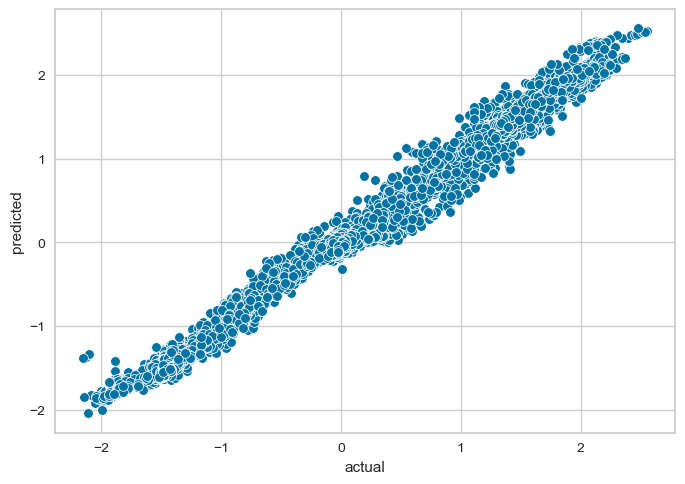

In [63]:
#plotting for actual and predicted 
sn.scatterplot(x=y2,y=preds)
plt.xlabel("actual")
plt.ylabel("predicted")

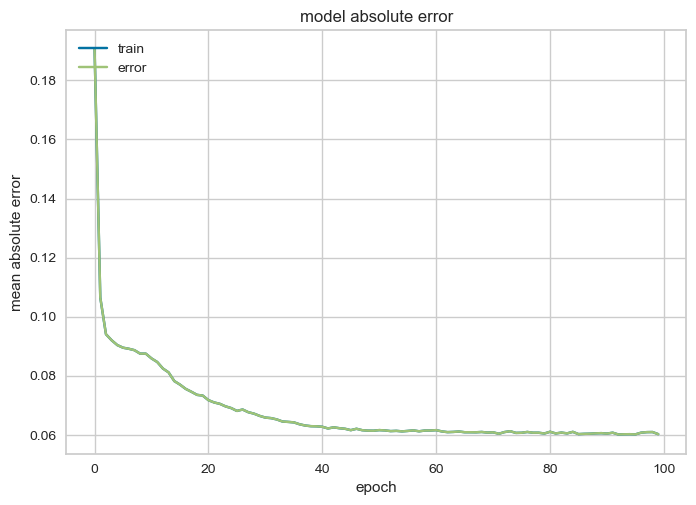

In [64]:
#plot with training and test error
history = model.fit(X2,y2,validation_split = 0.1, epochs=100, batch_size=30)
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['mean_absolute_error'])
plt.title('model absolute error')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train', 'error'], loc='upper left')
plt.show()

In [ ]:
## we observe at 100 epochs the error is lesser which shows that our model is accurate ##

# conclusions

1 The neural network is unaffected by the outliers impact when the percentage-outliers in the training data is lower than 15%.

2 Neural network has issues with time complexity therefore feature scaling and feature selection is necessary also 
dimension reduction can reduce the complexity

3 since we cant see the process within neural network hence they are also called as black box models.

4 neural network also has ability to perform parallel processing 